In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import cv2
from torchvision import transforms
from PIL import Image
import os
from google.colab.patches import cv2_imshow

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Kaggle Loading

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vighneshvmandavkar","key":"3e65d69233fc10e90eb78497cf58ecfe"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vighneshvmandavkar/jamini-roy-paintings

Dataset URL: https://www.kaggle.com/datasets/vighneshvmandavkar/jamini-roy-paintings
License(s): Apache 2.0
 49% 5.00M/10.2M [00:00<00:00, 30.3MB/s]
100% 10.2M/10.2M [00:00<00:00, 52.4MB/s]


In [ ]:
!unzip jamini-roy-paintings.zip

Archive:  jamini-roy-paintings.zip
  inflating: jamini_roy/1-6124609239_09e260e35b_c-2957510017.jpg  
  inflating: jamini_roy/2012_CKS_05415_0064_000(jamini_roy_untitled064340)-1893230946.jpg  
  inflating: jamini_roy/2014_NYR_02869_0529_000(jamini_roy_untitled)-4146194679.jpg  
  inflating: jamini_roy/2014_NYR_02869_0530_000(jamini_roy_untitled093728)-2644463896.jpg  
  inflating: jamini_roy/2016_NYR_12174_0628_000(jamini_roy_untitled).jpg  
  inflating: jamini_roy/2018_CKS_15503_0011_000(jamini_roy_untitled)-107920764.jpg  
  inflating: jamini_roy/69476427000619f169824c9be6c77560-3517003754.jpg  
  inflating: jamini_roy/Jamini-Roy-3464572219.jpg  
  inflating: jamini_roy/Jamini-Roy-Paintings1.2.jpg  
  inflating: jamini_roy/Jamini-Roy-Paintings1.jpg  
  inflating: jamini_roy/Jamini-Roy-Paintings11.jpg  
  inflating: jamini_roy/Jamini-Roy-Paintings12.jpg  
  inflating: jamini_roy/Jamini-Roy-Paintings14.jpg  
  inflating: jamini_roy/Jamini-Roy-Paintings16.jpg  
  inflating: jamini_roy/

In [ ]:
!kaggle datasets download -d birdy654/detecting-ai-generated-artwork

Dataset URL: https://www.kaggle.com/datasets/birdy654/detecting-ai-generated-artwork
License(s): unknown
 94% 193M/205M [00:02<00:00, 100MB/s] 
100% 205M/205M [00:02<00:00, 93.5MB/s]


In [ ]:
!unzip detecting-ai-generated-artwork.zip

Archive:  detecting-ai-generated-artwork.zip
  inflating: FAKE/0.jpg              
  inflating: FAKE/1.jpg              
  inflating: FAKE/10.jpg             
  inflating: FAKE/100.jpg            
  inflating: FAKE/1000.jpg           
  inflating: FAKE/1001.jpg           
  inflating: FAKE/1002.jpg           
  inflating: FAKE/1003.jpg           
  inflating: FAKE/1004.jpg           
  inflating: FAKE/1005.jpg           
  inflating: FAKE/1006.jpg           
  inflating: FAKE/1007.jpg           
  inflating: FAKE/1008.jpg           
  inflating: FAKE/1009.jpg           
  inflating: FAKE/101.jpg            
  inflating: FAKE/1010.jpg           
  inflating: FAKE/1011.jpg           
  inflating: FAKE/1012.jpg           
  inflating: FAKE/1013.jpg           
  inflating: FAKE/1014.jpg           
  inflating: FAKE/1015.jpg           
  inflating: FAKE/1016.jpg           
  inflating: FAKE/1017.jpg           
  inflating: FAKE/1018.jpg           
  inflating: FAKE/1019.jpg           
  inf

# HFRI

In [ ]:
def hfri(x, scale):
        # assert scale>2
        #print(f'input shape: {x.shape}, min: {x.min()}, max: {x.max()}, mean: {x.mean()}')
        if len(x.shape) == 2:
          x = x.unsqueeze(2)

        x = x.permute(2, 0, 1)
        transform = transforms.Resize((512,512))
        x = transform(x)
        x = x.permute(1, 2, 0)
        print(x.shape)
        x = torch.fft.fft2(x, norm="ortho")#,norm='forward'
        x = torch.fft.fftshift(x, dim=[-2, -1])

        h,w, c = x.shape
        print(x.shape)
        x[h//2-h//scale:h//2+h//scale,w//2-w//scale:w//2+w//scale, : ] = 0.0
        x = torch.fft.ifftshift(x, dim=[-2, -1])
        x = torch.fft.ifft2(x, norm="ortho")
        x = torch.real(x)
        x = F.relu(x, inplace=True)

        #print(f'output shape: {x.shape}, min: {x.min()}, max: {x.max()}, mean: {x.mean()}')
        #print()
        return x

In [ ]:
def highfilter(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)

  rows, cols = img.shape
  crow,ccol = rows//2 , cols//2
  fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
  f_ishift = np.fft.ifftshift(fshift)
  img_back = np.fft.ifft2(f_ishift)
  img_back = np.real(img_back)

  return img_back

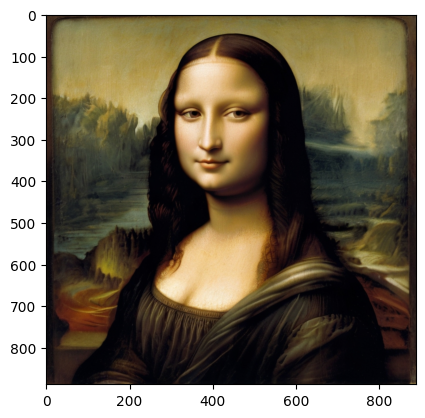

In [ ]:
img = cv2.imread('/content/drive/MyDrive/data/Default_Mona_Lisa_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

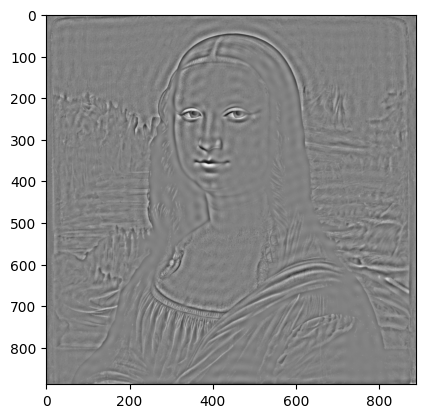

In [ ]:
pic = highfilter('/content/drive/MyDrive/data/Default_Mona_Lisa_2.jpg')
plt.imshow(pic, cmap='gray')

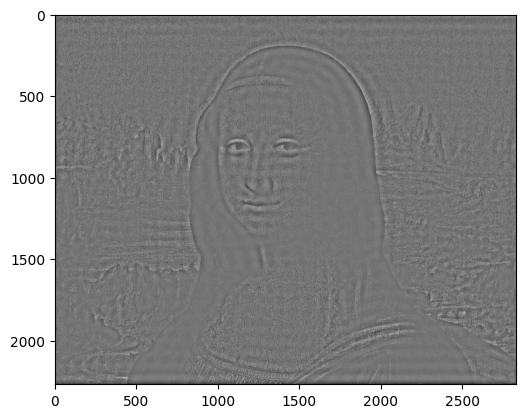

In [ ]:
pic = highfilter('/content/drive/MyDrive/data/MonaLisa-662199825.jpg')
plt.imshow(pic, cmap='gray')

torch.Size([512, 512, 3])
torch.Size([512, 512, 3])


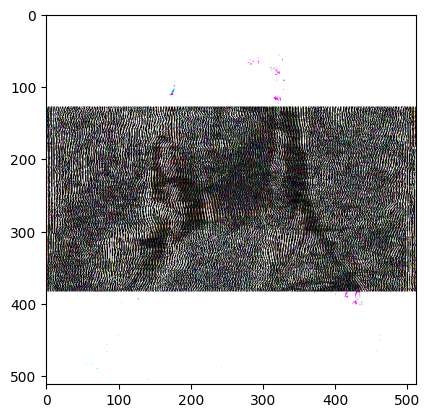

In [ ]:
img_hfri = hfri(torch.from_numpy(img), 4)
plt.imshow(img_hfri.numpy())

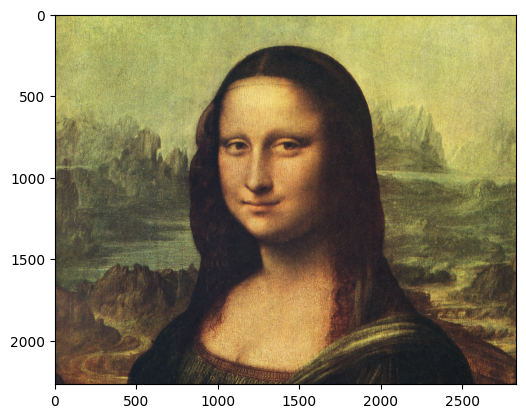

In [ ]:
img = cv2.imread('/content/drive/MyDrive/data/MonaLisa-662199825.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

torch.Size([512, 512, 3])
torch.Size([512, 512, 3])


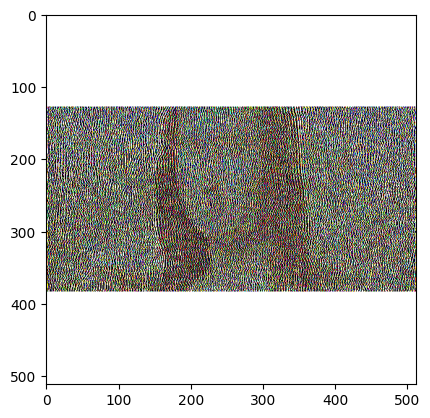

In [ ]:
img_hfri = hfri(torch.from_numpy(img), 4)
plt.imshow(img_hfri.numpy())

# Spectrum

In [ ]:
def spectrum(image):

  image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  # Compute the discrete Fourier Transform of the image
  fourier = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

  # Shift the zero-frequency component to the center of the spectrum
  fourier_shift = np.fft.fftshift(fourier)

  # calculate the magnitude of the Fourier Transform
  magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))

  # Scale the magnitude for display
  magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

  return magnitude


In [ ]:
jamini_dir = '/content/jamini_roy'

data = []

for filename in os.listdir(jamini_dir):
    image = cv2.imread(os.path.join(jamini_dir, filename))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transform = transforms.Resize((512,512))
    image = torch.from_numpy(image)
    image = image.permute(2, 0, 1)
    image = transform(image)
    image = image.permute(1, 2, 0)

    image = spectrum(image.numpy())

    data.append(image)

data = np.array(data)

In [ ]:
mean_spectrum = np.mean(data, axis=0)
mean_spectrum.shape

(512, 512)

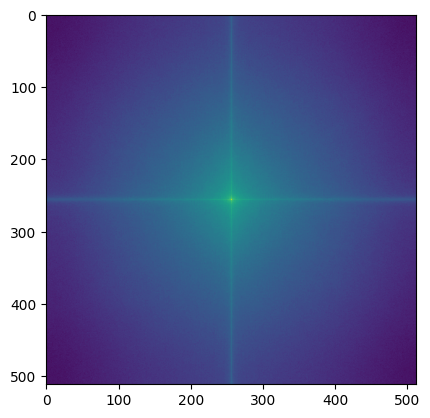

In [ ]:
plt.imshow(mean_spectrum)

In [ ]:
fake_dir = '/content/FAKE'
real_dir = '/content/REAL'

In [ ]:
fake_data = []

for filename in os.listdir(fake_dir):
    image = cv2.imread(os.path.join(fake_dir, filename))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transform = transforms.Resize((512,512))
    image = torch.from_numpy(image)
    image = image.permute(2, 0, 1)
    image = transform(image)
    image = image.permute(1, 2, 0)

    image = spectrum(image.numpy())

    fake_data.append(image)



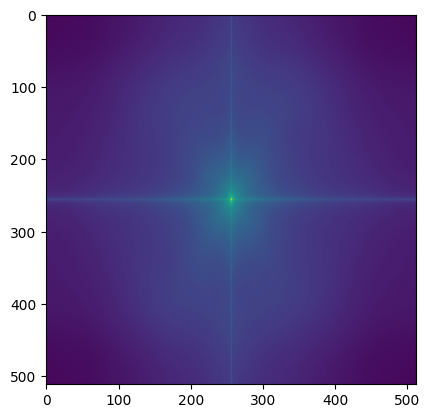

In [ ]:
fake_data = np.array(fake_data)
fake_spectrum = np.mean(fake_data, axis=0)
plt.imshow(fake_spectrum)

In [ ]:
real_data = []

for filename in os.listdir(real_dir):
    image = cv2.imread(os.path.join(real_dir, filename))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transform = transforms.Resize((512,512))
    image = torch.from_numpy(image)
    image = image.permute(2, 0, 1)
    image = transform(image)
    image = image.permute(1, 2, 0)

    image = spectrum(image.numpy())

    real_data.append(image)

In [ ]:
real_data.shape

(1705, 512, 512)

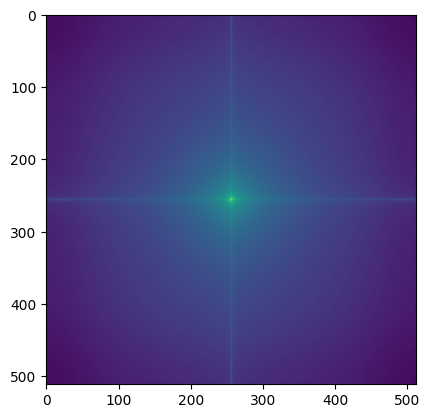

In [ ]:
real_data = np.array(real_data)
real_spectrum = np.mean(real_data, axis=0)
plt.imshow(real_spectrum)

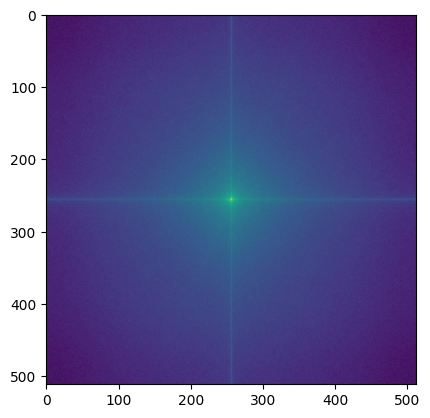

In [ ]:
real_data = np.array(real_data)
real_spectrum = np.mean(real_data[:20,:,:], axis=0)
plt.imshow(real_spectrum)